In [13]:
# 決定木

In [14]:
import sys
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import IPython
import sklearn
from sklearn.model_selection import train_test_split
import mglearn
import graphviz
%matplotlib inline

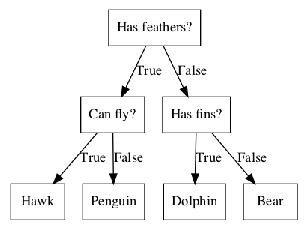

In [15]:
mglearn.plots.plot_animal_tree()

In [16]:
# 事前枝刈り

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(
    cancer.data , cancer.target , stratify=cancer.target , random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
display(tree.score(X_train,y_train))
display(tree.score(X_test,y_test))

1.0

0.9370629370629371

In [20]:
tree = DecisionTreeClassifier(max_depth=4 , random_state= 0)
tree.fit(X_train,y_train)

display(tree.score(X_train,y_train))
display(tree.score(X_test,y_test))

0.9882629107981221

0.951048951048951

In [21]:
from sklearn.tree import export_graphviz
export_graphviz(tree,out_file="tree.dot",class_names=["malignant","benign"],feature_names=cancer.feature_names,impurity=False,filled=True)

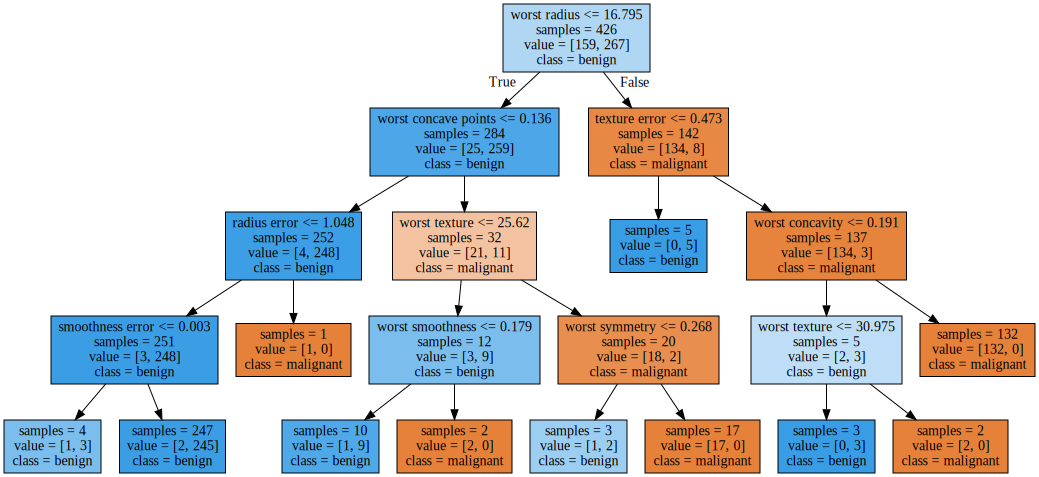

In [22]:
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)